# Step 1: Import Libraries

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


# Step 2: Load and Explore the Dataset

In [8]:
# Load the dataset with a specified encoding
try:
    data = pd.read_csv('disaster_data.csv', encoding='latin1')
except UnicodeDecodeError:
    data = pd.read_csv('disaster_data.csv', encoding='iso-8859-1')

# Display basic information and statistics
print(data.info())
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Display the first few rows
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 46 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   DisNo.                                     799 non-null    object 
 1   Historic                                   799 non-null    object 
 2   Classification Key                         799 non-null    object 
 3   Disaster Group                             799 non-null    object 
 4   Disaster Subgroup                          799 non-null    object 
 5   Disaster Type                              799 non-null    object 
 6   Disaster Subtype                           799 non-null    object 
 7   External IDs                               57 non-null     object 
 8   Event Name                                 207 non-null    object 
 9   ISO                                        799 non-null    object 
 10  Country                   

# Step 3: Data Preprocessing

__1. Handle Missing Values:__ Fill or drop missing values as necessary.

In [10]:
# Fill missing values for numeric columns with the mean of the column
numeric_cols = data.select_dtypes(include=['number']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Display the first few rows after filling missing values
print(data.head())

          DisNo. Historic Classification Key Disaster Group  \
0  2000-0020-IND       No    nat-met-ext-col        Natural   
1  2000-0027-IND       No    tec-tra-roa-roa  Technological   
2  2000-0030-IND       No    tec-tra-rai-rai  Technological   
3  2000-0077-IND       No    tec-mis-fir-fir  Technological   
4  2000-0147-IND       No    tec-tra-rai-rai  Technological   

        Disaster Subgroup         Disaster Type      Disaster Subtype  \
0          Meteorological   Extreme temperature             Cold wave   
1               Transport                  Road                  Road   
2               Transport                  Rail                  Rail   
3  Miscellaneous accident  Fire (Miscellaneous)  Fire (Miscellaneous)   
4               Transport                  Rail                  Rail   

  External IDs Event Name  ISO  ... Reconstruction Costs ('000 US$)  \
0          NaN        NaN  IND  ...                             NaN   
1          NaN        NaN  IND  ...     

__2. Convert Categorical Data:__ Encode categorical features using label encoding or one-hot encoding.

In [11]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoders = {}
for column in ['Disaster Group', 'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Check encoding
print(data[['Disaster Group', 'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype']].head())


   Disaster Group  Disaster Subgroup  Disaster Type  Disaster Subtype
0               0                  5              8                 6
1               1                  7             20                31
2               1                  7             19                29
3               1                  6             10                13
4               1                  7             19                29


__3.Feature Selection:__ Choose relevant features for prediction.

In [20]:
# features = ['Magnitude', 'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless', 'Reconstruction Costs', 'Total Damage', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype']
# X = data[features]
# y = data['DisNo']  # Assuming 'DisNo' is the target variable

# # Splitting the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the columns in the dataset
print(data.columns)

# Adjust the features list based on the existing columns
features = ['Magnitude', 'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless', 
            'Disaster Group', 'Disaster Subgroup', 'Disaster Type']

# Ensure all features exist in the dataset
existing_features = [feature for feature in features if feature in data.columns]
print("Existing features:", existing_features)

# # Display the first few rows to identify the appropriate target variable
# print(data.head())

# # Use the adjusted features list to create X and y
# X = data[existing_features]
# y = data['DisNo']  # Assuming 'DisNo' is the target variable

# # Splitting the dataset into training and testing sets
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Display shapes of the training and testing sets
# print("X_train shape:", X_train.shape)
# print("X_test shape:", X_test.shape)
# print("y_train shape:", y_train.shape)
# print("y_test shape:", y_test.shape)
# Adjust the target variable name (Assume 'Target' for now)
target_variable = 'Disaster Subtype'  # Replace with the actual target variable name

# Use the adjusted features list to create X and y
X = data[existing_features]
y = data[target_variable]  # Replace with the correct target variable name

# Preprocessing: Convert categorical variables to numerical
X = pd.get_dummies(X)

# Handle missing values (e.g., fill with mean or median)
X.fillna(X.mean(), inplace=True)

# Splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Index(['DisNo.', 'Historic', 'Classification Key', 'Disaster Group',
       'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
       'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region',
       'Location', 'Origin', 'Associated Types', 'OFDA/BHA Response', 'Appeal',
       'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damage ('000 US$)', 'Insured Damage, Adjusted ('000 US$)',
       'Total Damage ('000 US$)', 'Total Damage, Adjusted ('000 US$)', 'CPI',
       'Admin Units', 'Entry Date', 'Last Update'],
      dtype='object')
Existing features: ['Magnitude', 'Total Deaths', 'No. Injured', 'No. Affected', 'N

# Step 4: Feature Scaling

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Step 5: Model Selection and Training

In [22]:
# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

# Step 6: Model Evaluation

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMet

Accuracy: 0.71
Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 6 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 8]]
Classification Report:
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       1.00      0.80      0.89         5
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         5
          14       0.00      0.00      0.00         7
          15       0.30      0.25      0.27        12
          17 

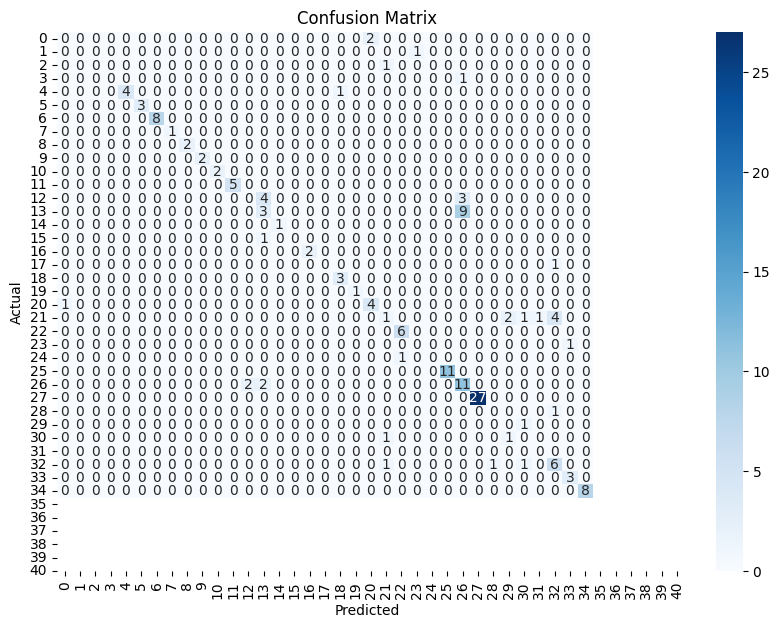

In [23]:
# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Step 7: Fine-Tuning and Further Steps

__1. Hyperparameter Tuning:__ Use GridSearchCV or RandomizedSearchCV for tuning hyperparameters.

In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')


c:\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
146 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Python312\Lib\site-packag

Best Parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}


__2. Re-evaluate the Model with the best parameters.__

In [25]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)

accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
class_report_best = classification_report(y_test, y_pred_best)

print(f'Optimized Accuracy: {accuracy_best:.2f}')
print('Optimized Confusion Matrix:')
print(conf_matrix_best)
print('Optimized Classification Report:')
print(class_report_best)


Optimized Accuracy: 0.73
Optimized Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 7 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 8]]
Optimized Classification Report:
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         5
          14       0.00      0.00      0.00         7
          15       0.17      0.08    

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
